In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("15-gym_crowdedness.csv")

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.shape

(62184, 11)

In [5]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [7]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [8]:
df.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [9]:
df["date"]=pd.to_datetime(df["date"],utc=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   number_people         62184 non-null  int64              
 1   date                  62184 non-null  datetime64[ns, UTC]
 2   timestamp             62184 non-null  int64              
 3   day_of_week           62184 non-null  int64              
 4   is_weekend            62184 non-null  int64              
 5   is_holiday            62184 non-null  int64              
 6   temperature           62184 non-null  float64            
 7   is_start_of_semester  62184 non-null  int64              
 8   is_during_semester    62184 non-null  int64              
 9   month                 62184 non-null  int64              
 10  hour                  62184 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(9)
memory usage: 5.2 M

In [11]:
df["date"]

0       2015-08-15 00:00:11+00:00
1       2015-08-15 00:20:14+00:00
2       2015-08-15 00:30:15+00:00
3       2015-08-15 00:40:16+00:00
4       2015-08-15 00:50:17+00:00
                   ...           
62179   2017-03-19 01:42:28+00:00
62180   2017-03-19 01:52:35+00:00
62181   2017-03-19 02:02:40+00:00
62182   2017-03-19 02:12:47+00:00
62183   2017-03-19 02:22:51+00:00
Name: date, Length: 62184, dtype: datetime64[ns, UTC]

In [12]:
df["date"].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
62179    2017
62180    2017
62181    2017
62182    2017
62183    2017
Name: date, Length: 62184, dtype: int32

In [13]:
df["year"]=df["date"].dt.year

In [14]:
df.drop("date",axis=1,inplace=True)

In [15]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,61211,4,0,0,71.76,0,0,8,17,2015
1,45,62414,4,0,0,71.76,0,0,8,17,2015
2,40,63015,4,0,0,71.76,0,0,8,17,2015
3,44,63616,4,0,0,71.76,0,0,8,17,2015
4,45,64217,4,0,0,71.76,0,0,8,17,2015


In [16]:
df["year"].unique()

array([2015, 2016, 2017], dtype=int32)

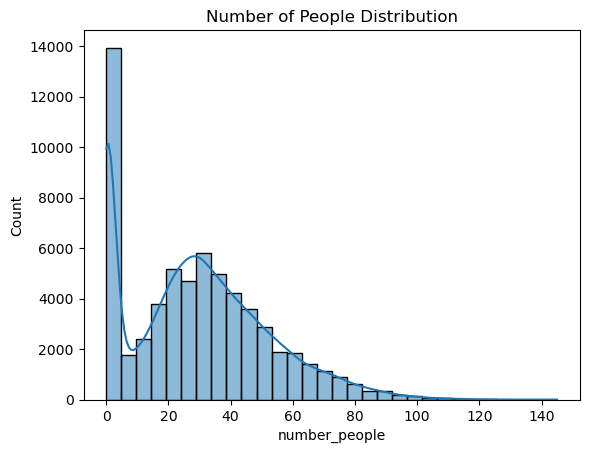

In [17]:
sns.histplot(df["number_people"], bins=30, kde=True)
plt.title("Number of People Distribution")
plt.show()

/var/folders/j4/812r9j5n3jq73qnzmqwqp5pc0000gn/T/ipykernel_11850/526452752.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="hour", y="number_people", ci=None)


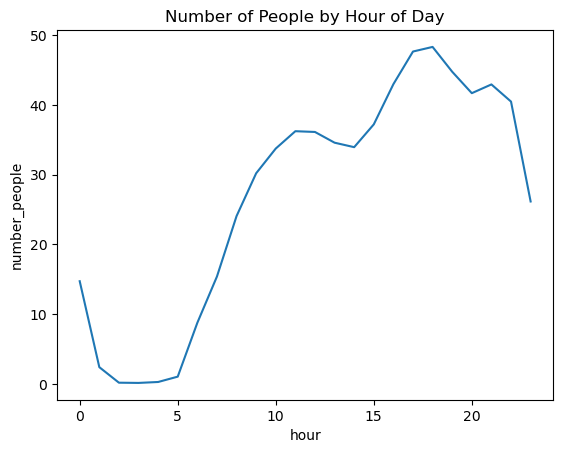

In [18]:
sns.lineplot(data=df, x="hour", y="number_people", ci=None)
plt.title("Number of People by Hour of Day")
plt.show()

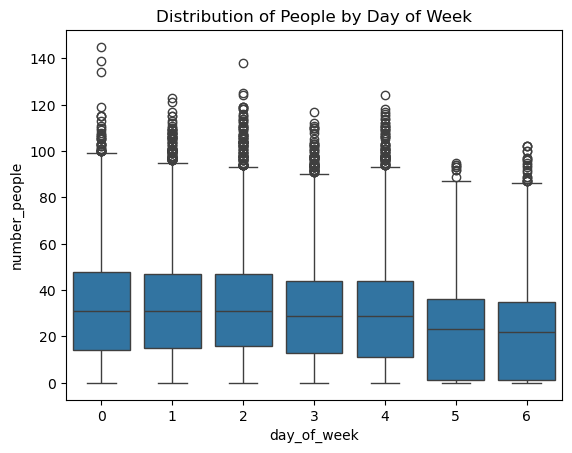

In [19]:
sns.boxplot(data=df, x="day_of_week", y="number_people")
plt.title("Distribution of People by Day of Week")
plt.show()

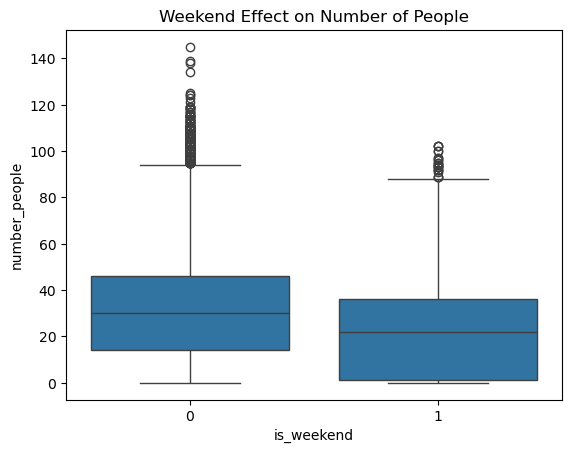

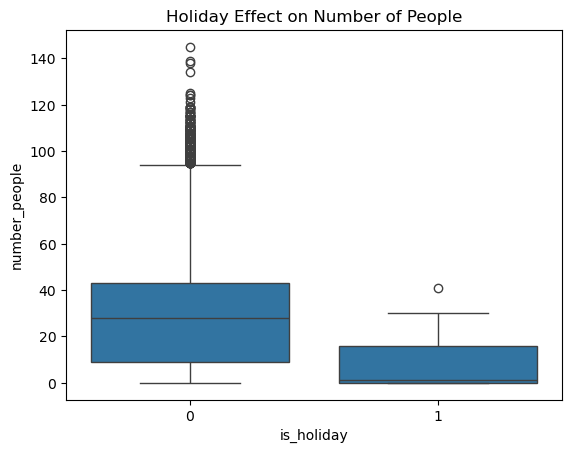

In [20]:
sns.boxplot(data=df, x="is_weekend", y="number_people")
plt.title("Weekend Effect on Number of People")
plt.show()

sns.boxplot(data=df, x="is_holiday", y="number_people")
plt.title("Holiday Effect on Number of People")
plt.show()

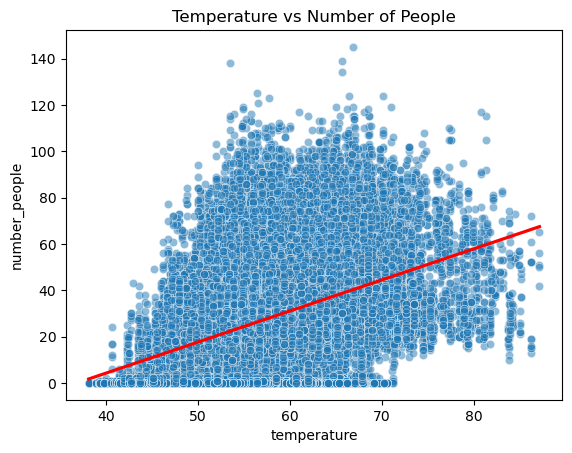

In [21]:
sns.scatterplot(data=df, x="temperature", y="number_people", alpha=0.5)
sns.regplot(data=df, x="temperature", y="number_people", scatter=False, color="red")
plt.title("Temperature vs Number of People")
plt.show()

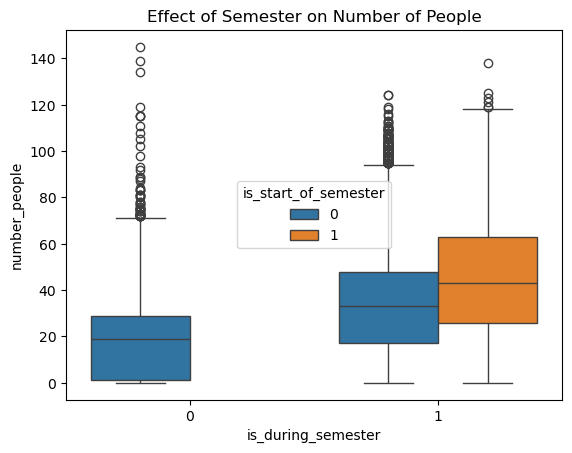

In [22]:
sns.boxplot(data=df, x="is_during_semester", y="number_people", hue="is_start_of_semester")
plt.title("Effect of Semester on Number of People")
plt.show()

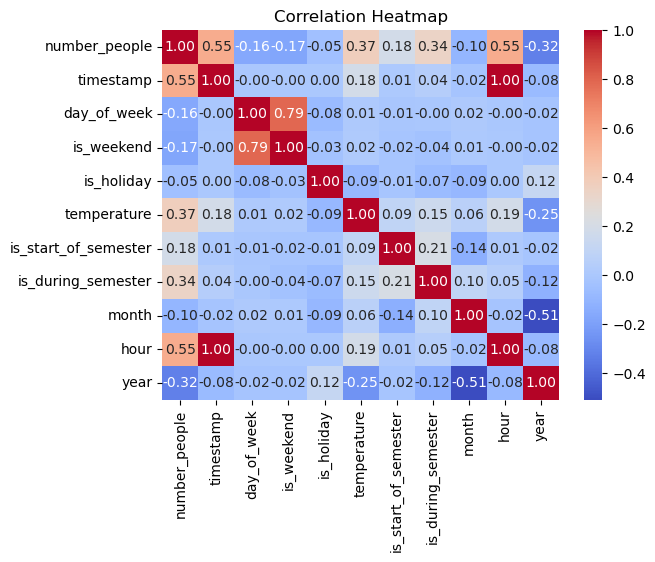

In [23]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
df.drop("timestamp",axis=1,inplace=True)

In [25]:
#dependent & independent feature

In [26]:
X=df.drop("number_people",axis=1)
y=df["number_people"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
def calculate_model_metric(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    skor=r2_score(true,predicted)
    rmse=np.sqrt(mse)
    return mae,rmse,skor,mse

In [30]:
models={
    "Linear Regression" : LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Desicion Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression":RandomForestRegressor()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_skor,model_train_mse=calculate_model_metric(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_skor,model_test_mse=calculate_model_metric(y_test,y_test_pred)


    print("------------------------------------------------------------------------------------------")
    print(list(models.values())[i])
    print("-------Evaluation for Training Set-------")
    print("MAE : ",model_train_mae)
    print("RMSE : ",model_train_rmse)
    print("MSE : ",model_train_mse)
    print("Skor : ",model_train_skor)
    print("-------Evaluation for Test Set-------")
    print("MAE : ",model_test_mae)
    print("RMSE : ",model_test_rmse)
    print("MSE : ",model_test_mse)
    print("Skor : ",model_test_skor)
    

------------------------------------------------------------------------------------------
LinearRegression()
-------Evaluation for Training Set-------
MAE :  10.733469936454249
RMSE :  14.322500408269727
MSE :  205.13401794488652
Skor :  0.5999639521710997
-------Evaluation for Test Set-------
MAE :  10.779752371029454
RMSE :  14.450632903370547
MSE :  208.82079130797547
Skor :  0.5989271376662777
------------------------------------------------------------------------------------------
Lasso()
-------Evaluation for Training Set-------
MAE :  11.197990734475258
RMSE :  14.846582000204318
MSE :  220.42099708879084
Skor :  0.5701525011926797
-------Evaluation for Test Set-------
MAE :  11.221544204118098
RMSE :  14.973602902398365
MSE :  224.20878387871278
Skor :  0.569372100606709
------------------------------------------------------------------------------------------
Ridge()
-------Evaluation for Training Set-------
MAE :  10.733458990440718
RMSE :  14.322500530139642
MSE :  205.134

In [31]:
# best params for : KNN {'n_neighbors': 2}
# best params for : RF {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}

In [34]:
models = {
    "K-Neighbors Regressor"  : KNeighborsRegressor(n_neighbors=2),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=500,
                                                     min_samples_split=2,
                                                      max_features=7,
                                                      max_depth = None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_skor,model_train_mse=calculate_model_metric(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_skor,model_test_mse=calculate_model_metric(y_test,y_test_pred)


    print("------------------------------------------------------------------------------------------")
    print(list(models.values())[i])
    print("-------Evaluation for Training Set-------")
    print("MAE : ",model_train_mae)
    print("RMSE : ",model_train_rmse)
    print("MSE : ",model_train_mse)
    print("Skor : ",model_train_skor)
    print("-------Evaluation for Test Set-------")
    print("MAE : ",model_test_mae)
    print("RMSE : ",model_test_rmse)
    print("MSE : ",model_test_mse)
    print("Skor : ",model_test_skor)

------------------------------------------------------------------------------------------
KNeighborsRegressor(n_neighbors=2)
-------Evaluation for Training Set-------
MAE :  3.562985119430507
RMSE :  5.485712449844521
MSE :  30.093041082379177
Skor :  0.9413149445306432
-------Evaluation for Test Set-------
MAE :  4.6422230798919335
RMSE :  6.947356308765721
MSE :  48.265759680946864
Skor :  0.9072980891093406
------------------------------------------------------------------------------------------
RandomForestRegressor(max_features=7, n_estimators=500)
-------Evaluation for Training Set-------
MAE :  3.197238182215438
RMSE :  4.710815109347859
MSE :  22.191778994460076
Skor :  0.9567233574802725
-------Evaluation for Test Set-------
MAE :  4.292321903620154
RMSE :  6.419604780931141
MSE :  41.211325543353965
Skor :  0.9208472288956002
